In [1]:
#goal
#determine "must-have" amenities that result in a great customer experience and ultimately a good review score

#assumptions
#amenities are assumed to exist for all time review data despite the possibiliy of hosts adding/removing amenities over time

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MultiLabelBinarizer
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(r'../data/2022-09-15/listings.csv')
df['amenities'] = df['amenities'].apply(lambda x: pd.eval(x)) #read_csv was importing 'amenities' as a string - this converts it to a series of lists
display(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7733 entries, 0 to 7732
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7733 non-null   int64  
 1   listing_url                                   7733 non-null   object 
 2   scrape_id                                     7733 non-null   int64  
 3   last_scraped                                  7733 non-null   object 
 4   source                                        7733 non-null   object 
 5   name                                          7733 non-null   object 
 6   description                                   7691 non-null   object 
 7   neighborhood_overview                         5502 non-null   object 
 8   picture_url                                   7733 non-null   object 
 9   host_id                                       7733 non-null   i

None

In [4]:
df = df[['id','review_scores_rating', 'amenities','number_of_reviews']]
display(df.info(verbose=True))
#review_score_rating has nulls, will filtering on number_of_review > 0 will remove them? If not we should figure out why they're null.
df = df[df.number_of_reviews > 0]
display(df.info(verbose=True))
#filter worked, and now we have no nulls (amenities list can still have nulls, will look into later)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7733 entries, 0 to 7732
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7733 non-null   int64  
 1   review_scores_rating  6824 non-null   float64
 2   amenities             7733 non-null   object 
 3   number_of_reviews     7733 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 241.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6824 entries, 0 to 7732
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6824 non-null   int64  
 1   review_scores_rating  6824 non-null   float64
 2   amenities             6824 non-null   object 
 3   number_of_reviews     6824 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 266.6+ KB


None

In [5]:
mlb = MultiLabelBinarizer()
amenities = pd.DataFrame(mlb.fit_transform(df['amenities']),columns=mlb.classes_, index=df.index)
print(amenities.shape)
display(amenities.head())
#appears to be thousands of amenities that can be custom entered by the host - we'll have to reduce this to the standard amenities airbnb provides

(6824, 2296)


Beekman Fresh Air  shampoo   GE stove  \
0                            0          0   
1                            0          0   
2                            0          0   
3                            0          0   
4                            0          0   

    Small bluetooth speaker Bluetooth sound system  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   "Everyone" and a local non-profit bar of soap. body soap  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   "Everyone" shampoo  \
0                   0   
1                   0   
2                   0   
3                   0   
4                   0   

   1 burner portable induction glass stove top induction stove  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   1/2 size in kitchenette with separate freezer and mini fridge in one bedroom refrigerator  \
0                                                  0                                           
1                                                  0                                           
2                                                  0                                           
3                                                  0                                           
4                                                  0                                           

   100" TV with Roku, Amazon Prime Video, Netflix, Apple TV, HBO Max  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

   120" HDTV with Apple TV, Netflix, premium cable, Amazon Prime Video  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   13" TV  ...  Yamaha Sound Bar Bluetooth sound system  \
0       0  ...                                        0   
1       0  ...                                        0   
2       0  ...                                        0   
3       0  ...                                        0   
4       0  ...                                        0   

   Yuzu hand soap and hand lotion body soap  Zealios body soap  \
0                                         0                  0   
1                                         0                  0   
2                                         0                  0   
3                                         0                  0   
4                                         0                  0   

   Zealios conditioner  Zealios shampoo  \
0                    0                0   
1                    0                0   
2                    0                0   
3                    0                0   
4                    0                0   

   Zogics Citru

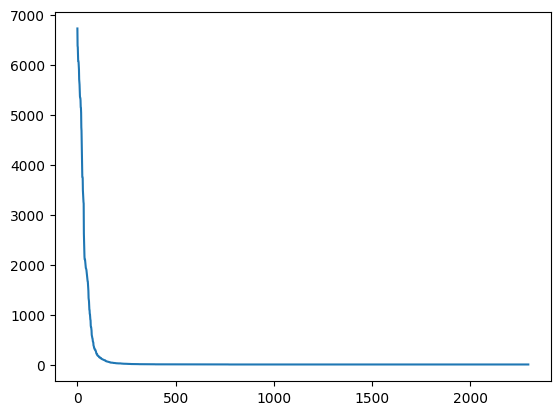

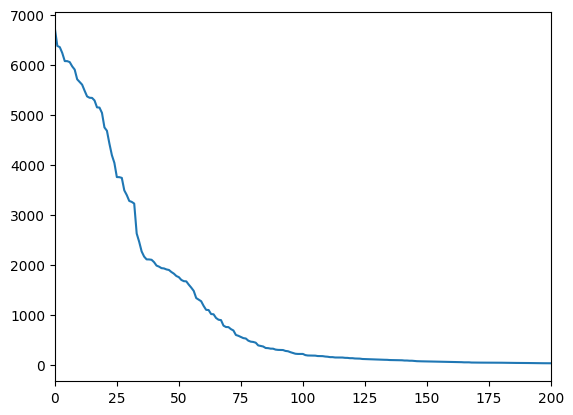

In [23]:
num_times_amenity_offered = amenities.sum().sort_values(ascending=False).reset_index()
plt.plot(num_times_amenity_offered[0])
plt.show()
plt.plot(num_times_amenity_offered[0])
plt.xlim([0,200])
plt.show()
#there seems to be a steep dropoff where more and more custom amenities become unique values
#I think we should only look at the top 50 amenities

In [37]:
top_50_amenities_list = amenities.sum().sort_values(ascending=False).reset_index().head(50)['index'].to_list()
print(top_50_amenities_list)
top_50_amenities_df = amenities[top_50_amenities_list]
top_50_amenities_df

['Smoke alarm', 'Wifi', 'Essentials', 'Hair dryer', 'Iron', 'Coffee maker', 'Kitchen', 'Long term stays allowed', 'Hangers', 'Dishes and silverware', 'Hot water', 'Microwave', 'Refrigerator', 'Free parking on premises', 'Carbon monoxide alarm', 'Shampoo', 'Fire extinguisher', 'Bed linens', 'Heating', 'Cooking basics', 'Dishwasher', 'Air conditioning', 'Private entrance', 'Oven', 'Stove', 'Washer', 'Extra pillows and blankets', 'First aid kit', 'Dryer', 'Dedicated workspace', 'TV', 'Free street parking', 'Bathtub', 'Security cameras on property', 'Freezer', 'Keypad', 'Wine glasses', 'Private patio or balcony', 'Toaster', 'Baking sheet', 'Cleaning products', 'Dining table', 'Outdoor furniture', 'Shower gel', 'Central air conditioning', 'Body soap', 'Ceiling fan', 'Cable TV', 'BBQ grill', 'Conditioner']


Smoke alarm  Wifi  Essentials  Hair dryer  Iron  Coffee maker  Kitchen  \
0               1     1           1           1     1             1        1   
1               1     1           1           1     1             1        0   
2               1     1           1           1     1             1        1   
3               1     0           1           1     1             1        0   
4               1     1           1           1     1             1        1   
...           ...   ...         ...         ...   ...           ...      ...   
7728            1     1           1           1     1             1        1   
7729            1     1           1           1     1             1        1   
7730            1     1           1           1     1             1        1   
7731            1     1           1           0     0             1        1   
7732            1     0           1           0     0             1        1   

      Long term stays allowed  Hangers  Dishes and silverware  ...  \
0                           1        1                      1  ...   
1                           1        1                      0  ...   
2                           1        1                      1  ...   
3                           0        1                      1  ...   
4                           1        1                      1  ...   
...                       ...      ...                    ...  ...   
7728                        1        1                      1  ...   
7729                        1        1                      1  ...   
7730                        1        1                      1  ...   
7731                        1        1                      1  ...   
7732                        1        1                      1  ...   

      Cleaning products  Dining table  Outdoor furniture  Shower gel  \
0                     0             0                  0           0   
1                     0             0                  0           0   
2                     1             1                  1           0   
3                     0             0                  0           0   
4                     0             0                  0           0   
...                 ...           ...                ...         ...   
7728                  1             1                  0           0   
7729                  0             0                  0           0   
7730                  1             1                  0           0   
7731                  1             0                  1           1   
7732                  1             0                  1           1   

      Central air conditioning  Body soap  Ceiling fan  Cable TV  BBQ grill  \
0                            0          0            0         0          0   
1                            0          0            0         0          0   
2                            0          1            1         0          0   
3                            0          0            0         1          0   
4                            0          0            0         1          0   
...                        ...        ...          ...       ...        ...   
7728                         1          0            1         0          0   
7729                         0          0            0         0          0   
7730                         0          0            1         0          0   
7731                         0          1            1         0          0   
7732                         1          0            1         0          0   

      Conditioner  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
7728            0  
7729            0  
7730            0  
7731            1  
7732            0  

[6824 rows x 50 columns]

In [38]:
print(top_50_amenities_df.info(verbose=True))
#also appears to be a string encoding issue. Will debug this later

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6824 entries, 0 to 7732
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Smoke alarm                   6824 non-null   int32
 1   Wifi                          6824 non-null   int32
 2   Essentials                    6824 non-null   int32
 3   Hair dryer                    6824 non-null   int32
 4   Iron                          6824 non-null   int32
 5   Coffee maker                  6824 non-null   int32
 6   Kitchen                       6824 non-null   int32
 7   Long term stays allowed       6824 non-null   int32
 8   Hangers                       6824 non-null   int32
 9   Dishes and silverware         6824 non-null   int32
 10  Hot water                     6824 non-null   int32
 11  Microwave                     6824 non-null   int32
 12  Refrigerator                  6824 non-null   int32
 13  Free parking on premises      682